# MOA "Array Interface"

This is very much a work in progress. I want to see how far a python wrapper around a moa interface will take us.

In [1]:
from moa.frontend import LazyArray

In [2]:
expression = (LazyArray(name='A', shape=(3, 4)).transpose())[0][1]

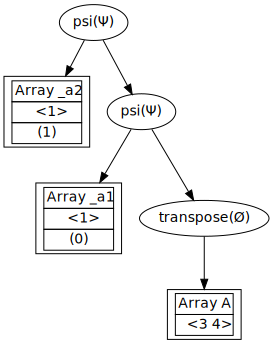

In [3]:
expression

In [5]:
print(expression.compile())



def f(A):
    
    if (not (len(A.shape) == 2)):
        
        raise Exception('arguments have invalid dimension')
    
    if (not ((4 == A.shape[1]) and (3 == A.shape[0]))):
        
        raise Exception('arguments have invalid shape')
    
    _a12 = Array(())
    
    _a12[()] = A[(1, 0)]
    return _a12


In [7]:
from moa.array import Array

A = Array(shape=(3, 4), value=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

exec(expression.compile())

B = f(A=A)

print('shape', B.shape)
print('value', B.value)

shape ()
value [5]
